# Perkenalan

**Anggota Kelompok**
1. Fachriansyah Muhammad Haikal (PYTN-KS14-010)
2. Fakhrurrozi (PYTN-KS14-018)
3. Safira Alya Fafaza (PYTN-KS14-017)

**Latar Belakang**

Hujan merupakan permasalahan penting dalam kegiatan sehari-hari. Di Australia sendiri, prediksi hujan memiliki nilai penting karena negara ini sering mengalami cuaca yang tidak menentu dan rentan terhadap kekeringan serta bencana alam yang terkait dengan pola hujan yang tidak teratur.

Model Logistic Regression adalah metode statistik yang digunakan untuk memodelkan hubungan antara variabel dependen biner (dalam kasus ini, hujan atau tidak hujan) dengan satu atau lebih variabel independen (misalnya suhu, kelembaban, tekanan udara, dan sebagainya). Dalam hal prediksi hujan di Australia, model Logistic Regression dapat membantu mengidentifikasi pola dan korelasi antara variabel cuaca dan kemungkinan terjadinya hujan.

Sementara itu, Support Vector Machine (SVM) adalah algoritma pembelajaran mesin yang digunakan untuk membangun model prediktif dengan melakukan klasifikasi pada data yang telah diberikan. SVM berfungsi dengan mencari batas pemisah antara dua kelas data (hujan atau tidak hujan) yang memaksimalkan jarak antara batas pemisah dan contoh data terdekat dari masing-masing kelas. Support Vector Machine dapat digunakan untuk memprediksi apakah suatu wilayah di Australia akan mengalami hujan atau tidak berdasarkan data cuaca historis dan fitur-fitur yang relevan.

Kedua model ini dapat digunakan untuk menganalisis data cuaca historis, termasuk variabel seperti suhu, curah hujan sebelumnya, kelembaban udara, arah dan kecepatan angin, dan faktor cuaca lainnya. Dengan memanfaatkan data cuaca historis yang ada, model Logistic Regression dan Support Vector Machine dapat dilatih untuk memahami pola dan hubungan antara variabel cuaca dan kemungkinan hujan di masa depan.

Sehingga, untuk membantu masyarakat di Australia maka diperlukan adanya "Sistem Prediksi Hujan di Australia dengan Menggunakan Model Logistic Regression dan Support Vector Machine". Namun, penting untuk diingat bahwa keberhasilan prediksi hujan menggunakan model ini bergantung pada kualitas dan kuantitas data yang tersedia, serta faktor-faktor lain yang dapat mempengaruhi pola cuaca di Australia. Selain itu, model ini juga dapat dioptimalkan dan disesuaikan dengan metode lainnya untuk meningkatkan kinerja prediksi.

**Dataset**

Dataset yang digunakan dalam projek ini adalah **Rain in Australia** yang berisi data 10 tahun cuaca harian di Australia. Dataset ini memiliki 145460 dengan 23 atribut. Namun pada projek ini atribut yang akan digunakan dan diperlukan untuk membuat sistem prediksi sebanyak 22 antara lain sebagai berikut :
1. Location : lokasi, nama kota di Australia
2. MinTemp : temperatur terendah hari itu dalam celcius
3. MaxTemp : temperatur tertinggi hari itu dalam celcius
4. Rainfall : jumlah curah hujan hari itu dalam mm
5. Evaporation : jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
6. Sunshine : jumlah jam hari itu cerah dengan cahaya matahari
7. WindGustDir : arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
8. WindGustSpeed : kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
9. WindDir9am : arah angin jam 9 pagi
10. WindDir3pm : arah angin jam 3 sore
11. WindSpeed9am : kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
12. WindSpeed3pm : kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. Humidity9am : humiditas jam 9 pagi dalam persen
14. Humidity3pm : humiditas jam 3 sore dalam persen
15. Pressure9am : tekanan udara jam 9 pagi dalam hpa
16. Pressure3pm : tekanan udara jam 3 sore dalam hpa
17. Cloud9am : persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
18. Cloud3pm : persentase langit yang tertutup awan jam 3 sore
19. Temp9am : temperatur jam 9 pagi dalam celcius
20. Temp3pm : temperatur jam 3 sore dalam celcius
21. RainToday : apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak nilainya 0
22. RainTomorrow : variable yang mau di prediksi

**Objektif**

* menemukan faktor-faktor yang mempengaruhi terjadinya hujan di Australia
* menemukan perbandingan akurasi prediksi hujan di Australia dengan menggunakan model Logistic Regression dan Support Vector Machine  
* memberikan wawasan yang dapat bermanfaat bagi masyarakat di Australia

# Import Library

In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# jumlah data dan kolom
df.shape

(65298, 23)

Dapat diketahui bahwa terdapat **145460** baris dan **23** kolom

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65298 entries, 0 to 65297
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           65298 non-null  object 
 1   Location       65298 non-null  object 
 2   MinTemp        64679 non-null  float64
 3   MaxTemp        64848 non-null  float64
 4   Rainfall       63842 non-null  float64
 5   Evaporation    28173 non-null  float64
 6   Sunshine       21365 non-null  float64
 7   WindGustDir    59227 non-null  object 
 8   WindGustSpeed  59235 non-null  float64
 9   WindDir9am     58624 non-null  object 
 10  WindDir3pm     62535 non-null  object 
 11  WindSpeed9am   63929 non-null  float64
 12  WindSpeed3pm   63311 non-null  float64
 13  Humidity9am    64016 non-null  float64
 14  Humidity3pm    63559 non-null  float64
 15  Pressure9am    55209 non-null  float64
 16  Pressure3pm    55261 non-null  float64
 17  Cloud9am       37937 non-null  float64
 18  Cloud3

In [5]:
# data unik dari setiap kolom bertipe data object
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

Date
['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
Location
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport']
WindGustDir
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
WindDir9am
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
WindDir3pm
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
RainToday
['No' 'Yes' nan]
RainTomorrow
['No' 'Yes' nan]


# Data Cleansing

## Hapus kolom yang tidak digunakan

In [6]:
df_used = df.copy()
# menghapus kolom Date
df_used.drop('Date',axis=1, inplace=True)

In [7]:
df_used.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Cek Data Kosong

In [8]:
df_used.isnull().sum()

Location             0
MinTemp            619
MaxTemp            450
Rainfall          1456
Evaporation      37125
Sunshine         43933
WindGustDir       6071
WindGustSpeed     6063
WindDir9am        6674
WindDir3pm        2763
WindSpeed9am      1369
WindSpeed3pm      1987
Humidity9am       1282
Humidity3pm       1739
Pressure9am      10089
Pressure3pm      10037
Cloud9am         27361
Cloud3pm         28139
Temp9am            946
Temp3pm           1461
RainToday         1457
RainTomorrow      1456
dtype: int64

In [9]:
df_missValue = pd.DataFrame({"MissingValue":df_used.isna().sum(), "Percent":df_used.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
df_missValue

,MissingValue,Percent
Location,0,0.0 %
MinTemp,619,0.95 %
MaxTemp,450,0.69 %
Rainfall,1456,2.23 %
Evaporation,37125,56.85 %
Sunshine,43933,67.28 %
WindGustDir,6071,9.3 %
WindGustSpeed,6063,9.29 %
WindDir9am,6674,10.22 %
WindDir3pm,2763,4.23 %


In [10]:
# menghapus atribut dengan persentase kosong diatas 30%
df_used.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)
df_used

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65293,MelbourneAirport,10.9,21.2,0.0,S,43.0,WSW,SSE,19.0,30.0,66.0,49.0,1011.1,1011.5,15.6,17.6,No,No
65294,MelbourneAirport,8.9,21.7,0.0,S,48.0,SW,SSE,9.0,30.0,65.0,42.0,1014.8,1014.5,14.4,18.6,No,No
65295,MelbourneAirport,9.2,26.0,0.0,SSE,41.0,SW,W,15.0,20.0,64.0,32.0,1013.2,1010.9,15.7,24.8,No,No
65296,MelbourneAirport,15.3,25.8,0.0,S,52.0,SW,S,11.0,30.0,77.0,46.0,1011.7,1010.0,18.3,25.0,No,Yes


In [11]:
# mengisi data kosong yang persentase dibawah 30%
df_used['MinTemp'].fillna(df_used['MinTemp'].mean(), inplace=True)
df_used['MaxTemp'].fillna(df_used['MaxTemp'].mean(), inplace=True)
df_used['Rainfall'].fillna(df_used['Rainfall'].mean(), inplace=True)
df_used['WindGustDir'].fillna(df_used['Rainfall'].mode()[0], inplace=True)
df_used['WindGustSpeed'].fillna(df_used['WindGustSpeed'].mean(), inplace=True)
df_used['WindDir9am'].fillna(df_used['WindDir9am'].mode()[0], inplace=True)
df_used['WindDir3pm'].fillna(df_used['WindDir3pm'].mode()[0], inplace=True)
df_used['WindSpeed9am'].fillna(df_used['WindSpeed9am'].mean(), inplace=True)
df_used['WindSpeed3pm'].fillna(df_used['WindSpeed3pm'].mean(), inplace=True)
df_used['Humidity9am'].fillna(df_used['Humidity9am'].mean(), inplace=True)
df_used['Humidity3pm'].fillna(df_used['Humidity3pm'].mean(), inplace=True)
df_used['Pressure9am'].fillna(df_used['Pressure9am'].mean(), inplace=True)
df_used['Pressure3pm'].fillna(df_used['Pressure3pm'].mean(), inplace=True)
df_used['Temp9am'].fillna(df_used['Temp9am'].mean(), inplace=True)
df_used['Temp3pm'].fillna(df_used['Temp3pm'].mean(), inplace=True)
df_used['RainToday'].fillna(df_used['RainToday'].mode()[0], inplace=True)

In [12]:
df_used.isnull().sum()

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow     1456
dtype: int64

In [13]:
# menghapus missing value pada kolom RainTomorrow
df_used.dropna(axis=0, inplace=True)

In [14]:
df_used.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

## Cek One Unique Value

In [15]:
for column in df_used.columns:
    print(column, df_used[column].nunique())

Location 22
MinTemp 373
MaxTemp 498
Rainfall 540
WindGustDir 17
WindGustSpeed 64
WindDir9am 16
WindDir3pm 16
WindSpeed9am 43
WindSpeed3pm 43
Humidity9am 98
Humidity3pm 101
Pressure9am 484
Pressure3pm 484
Temp9am 419
Temp3pm 496
RainToday 2
RainTomorrow 2


Dapat diketahui bahwa atribut yang ada tidak ditemukan one unique value sehingga tidak perlu ada yang dihapus.

## Cek Data Duplikat

In [16]:
df_used.duplicated().sum()

45

Terdapat 47 data duplikat maka diperlukan adanya penghapusan data yang duplikat.

In [17]:
df_used.drop_duplicates(inplace=True)
df_used.duplicated().sum()

0

# Explorasi Data

In [18]:
df_used.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63797 entries, 0 to 65296
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       63797 non-null  object 
 1   MinTemp        63797 non-null  float64
 2   MaxTemp        63797 non-null  float64
 3   Rainfall       63797 non-null  float64
 4   WindGustDir    63797 non-null  object 
 5   WindGustSpeed  63797 non-null  float64
 6   WindDir9am     63797 non-null  object 
 7   WindDir3pm     63797 non-null  object 
 8   WindSpeed9am   63797 non-null  float64
 9   WindSpeed3pm   63797 non-null  float64
 10  Humidity9am    63797 non-null  float64
 11  Humidity3pm    63797 non-null  float64
 12  Pressure9am    63797 non-null  float64
 13  Pressure3pm    63797 non-null  float64
 14  Temp9am        63797 non-null  float64
 15  Temp3pm        63797 non-null  float64
 16  RainToday      63797 non-null  object 
 17  RainTomorrow   63797 non-null  object 
dtypes: flo

## Analisa Deksriptif

In [19]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,64679.000000,64848.000000,63842.000000,28173.000000,21365.000000,59235.000000,63929.000000,63311.000000,64016.000000,63559.000000,55209.000000,55261.000000,37937.000000,37159.000000,64352.000000,63837.000000
mean,11.397842,22.321623,2.508418,5.310659,7.435301,39.810197,13.397941,18.245629,71.488237,53.019273,1018.261465,1015.823251,4.606664,4.671143,16.024733,20.879047
std,6.387053,6.887341,8.712657,4.313724,3.813798,14.230242,9.236760,9.379320,17.715577,20.697049,7.015152,6.901594,2.922153,2.715958,6.114159,6.707737
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,-7.200000,-5.400000
25%,6.800000,17.800000,0.000000,2.600000,4.600000,30.000000,7.000000,11.000000,60.000000,38.000000,1013.600000,1011.200000,1.000000,2.000000,11.800000,16.500000
50%,11.700000,22.000000,0.000000,4.400000,8.400000,37.000000,13.000000,17.000000,72.000000,53.000000,1018.300000,1015.900000,5.000000,5.000000,16.400000,20.600000
75%,16.500000,26.700000,0.800000,7.000000,10.400000,48.000000,19.000000,24.000000,85.000000,67.000000,1023.000000,1020.500000,7.000000,7.000000,20.600000,25.000000
max,30.500000,47.300000,371.000000,145.000000,14.100000,135.000000,130.000000,83.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.700000,46.700000


## Categorical Features

In [20]:
categorical_features = [feature for feature in df_used.columns if (
    df_used[feature].dtypes == "O")]
categorical_features

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [21]:
for feature in categorical_features:
    print(
        f"Feature {feature} memiliki unique value {(df_used[feature].nunique())}")

Feature Location memiliki unique value 22
Feature WindGustDir memiliki unique value 17
Feature WindDir9am memiliki unique value 16
Feature WindDir3pm memiliki unique value 16
Feature RainToday memiliki unique value 2
Feature RainTomorrow memiliki unique value 2


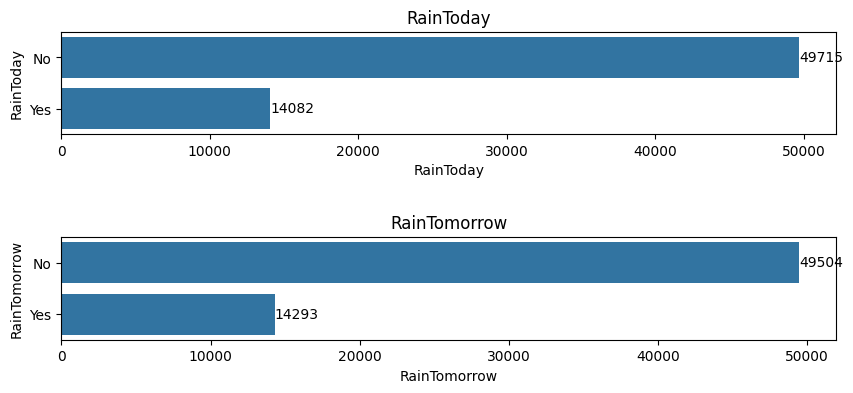

In [22]:
# visualisasi categorical features
plt.figure(figsize=(10, 4), facecolor="white")
plt.subplots_adjust(hspace=1)

ax = plt.subplot(2, 1, 1)
sns.countplot(y='RainToday', data=df_used)
ax.bar_label(ax.containers[0])
plt.xlabel('RainToday')
plt.title('RainToday')

ax = plt.subplot(2, 1, 2)
sns.countplot(y='RainTomorrow', data=df_used)
ax.bar_label(ax.containers[0])
plt.xlabel('RainTomorrow')
plt.title('RainTomorrow')

plt.show()

Dapat diketahui bahwa kedua grafik diatas masih tergolong tidak balance atau imbalance karena perbedaannya terlalu jauh

**Handling Imbalance Data**

Karena data tergolong imbalance perlu dilakukan balancing data. Pada kasus ini menggunakan undersampling, yaitu menyeimbangkan dataset dengan mengurangi ukuran kelas yang berlimpah

In [23]:
countRT = df_used["RainTomorrow"].value_counts()
countRT

No     49504
Yes    14293
Name: RainTomorrow, dtype: int64

In [24]:
n = min(countRT)
n

14293

In [25]:
subset_yes = df_used[df_used['RainTomorrow'] == 'Yes'].sample(n=n, random_state=42)
subset_no = df_used[df_used['RainTomorrow'] == 'No'].sample(n=n, random_state=42)

In [26]:
df_used = pd.concat([subset_yes, subset_no])

In [27]:
df_used.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
64541,MelbourneAirport,18.3,21.8,0.0,WSW,63.0,WSW,N,15.0,11.0,61.0,85.0,1008.8,1008.1,21.6,20.5,No,Yes
33192,Sydney,11.5,15.8,0.4,SE,54.0,W,S,15.0,24.0,76.0,77.0,1013.7,1013.9,12.8,13.2,No,Yes
32484,Sydney,10.5,19.3,0.0,ESE,44.0,W,ESE,13.0,19.0,81.0,61.0,1025.7,1022.4,13.7,18.8,No,Yes
63901,Sale,12.4,18.1,0.0,WSW,44.0,NE,NE,15.0,19.0,70.0,75.0,1012.6,1007.7,15.9,18.0,No,Yes
60874,Bendigo,4.8,14.8,8.8,NNE,28.0,ESE,N,6.0,13.0,93.0,60.0,1014.8,1012.4,9.2,13.3,Yes,Yes


## Numerical Features

In [28]:
numerical_features = [feature for feature in df_used.columns if (
    df_used[feature].dtypes != "O")]
print(numerical_features)
print(f"Terdapat {len(numerical_features)} Numerical Features")

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
Terdapat 12 Numerical Features


In [29]:
discrete_feature = [
    feature for feature in numerical_features if df_used[feature].nunique() < 25]
print(discrete_feature)
print(f"Terdapat {len(discrete_feature)} Discrete Numerical Features")

[]
Terdapat 0 Discrete Numerical Features


In [30]:
continuous_features = [
    feature for feature in numerical_features if feature not in discrete_feature]
print(continuous_features)
print(f"Terdapat {len(continuous_features)} Continuous Feature")

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
Terdapat 12 Continuous Feature


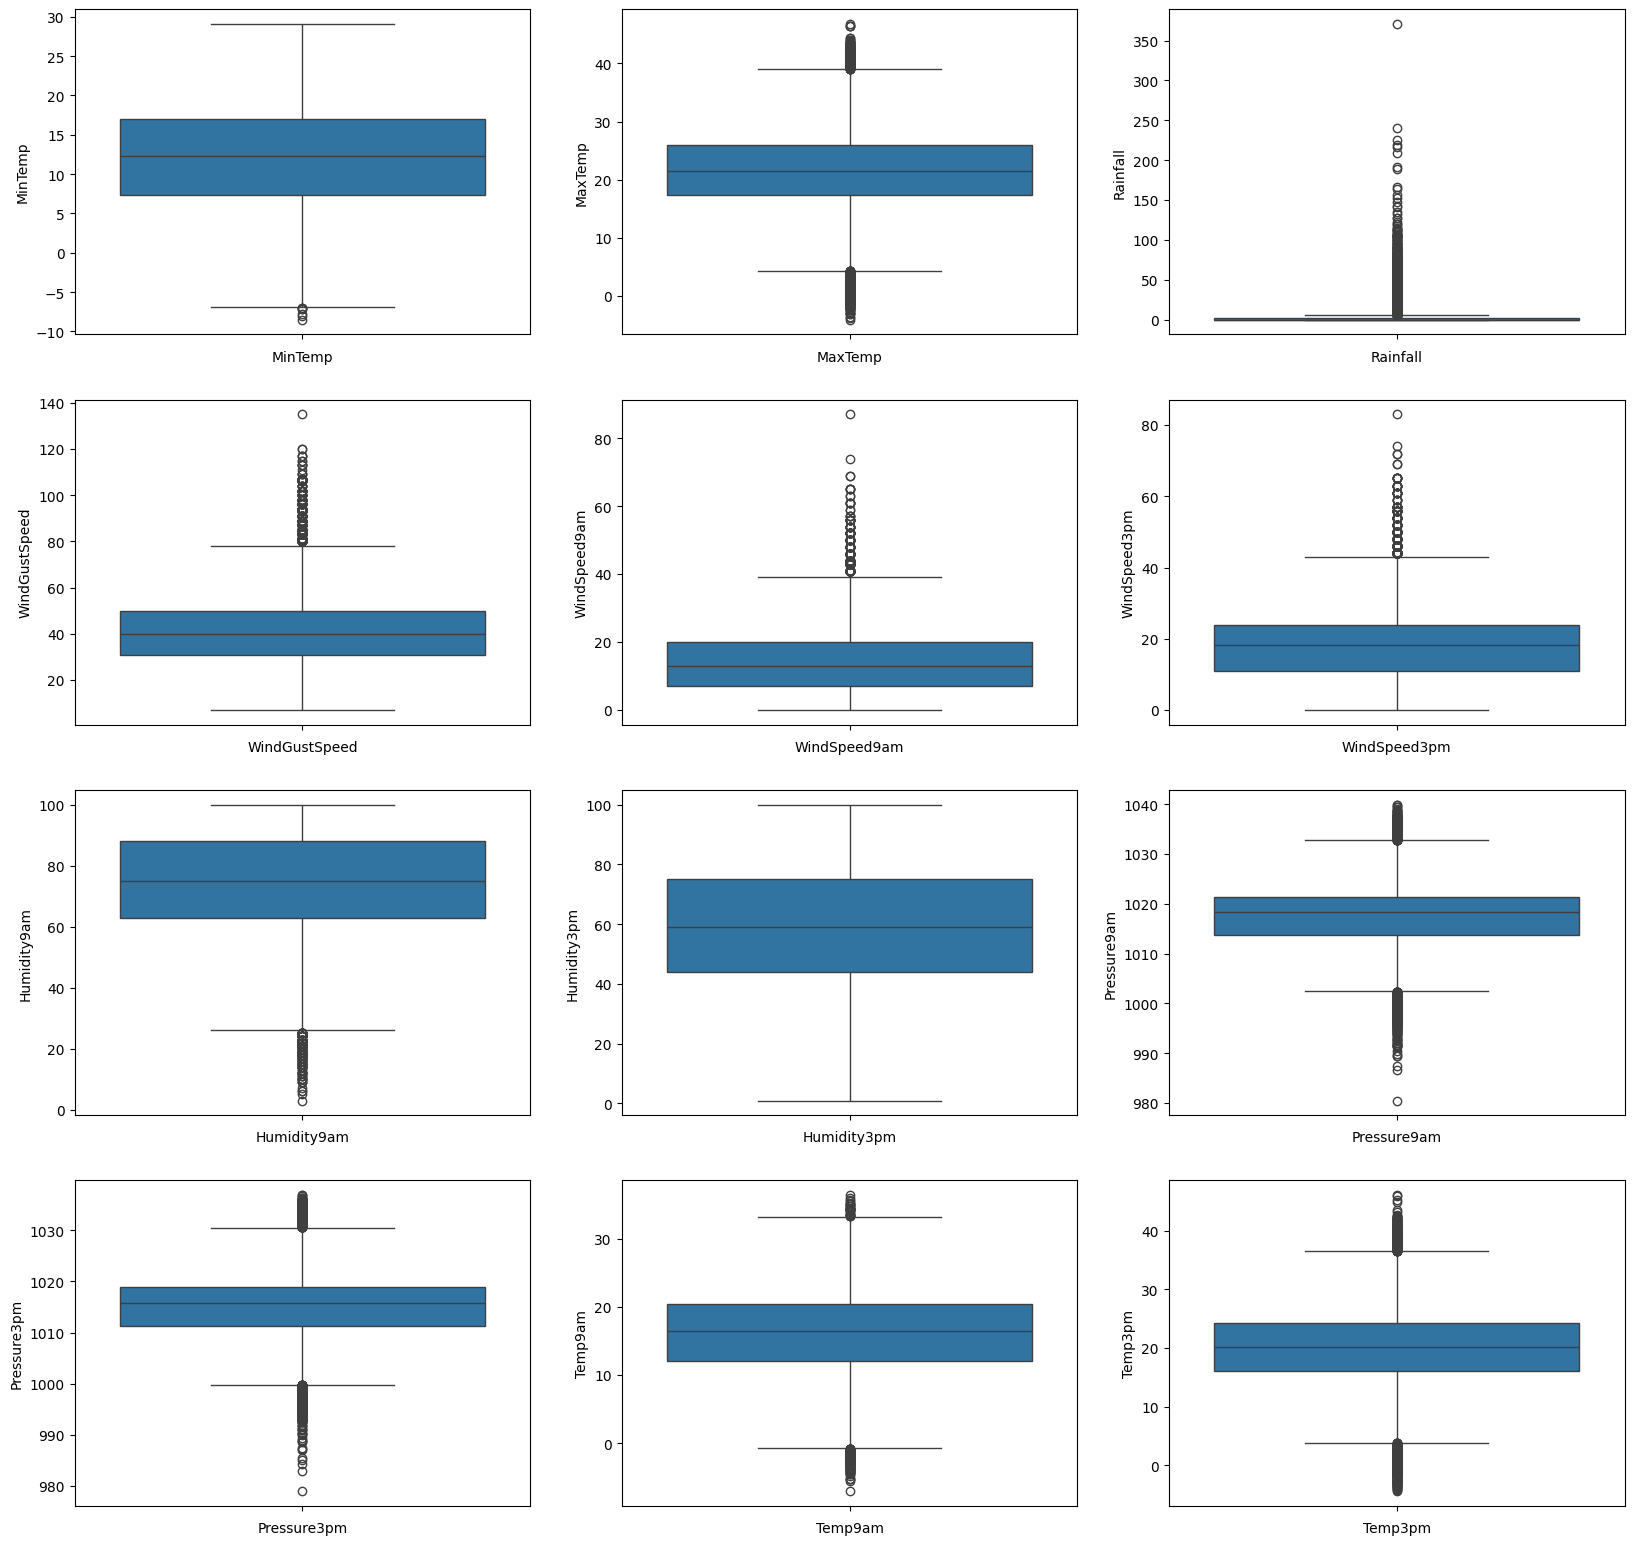

In [31]:
# visualisasi numerical features
plt.figure(figsize=(20, 60), facecolor='white')
num = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12, 3, num)
    sns.boxplot(df_used[numerical_feature])
    plt.xlabel(numerical_feature)
    num += 1
plt.show()

In [32]:
def count_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers[column].count()

In [33]:
count_outliers_iqr(df_used, ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm'])

MinTemp             7
MaxTemp           560
Rainfall         4355
WindGustSpeed     524
WindSpeed9am      357
WindSpeed3pm      441
Humidity9am       194
Humidity3pm         0
Pressure9am       814
Pressure3pm       759
Temp9am           164
Temp3pm           652
dtype: int64

Dapat diketahui bahwa terdapat banyak data yang outliers kecuali pada atribut Humidity3pm

**Handling Data Outlier**

In [34]:
df_used.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28586 entries, 64541 to 10905
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       28586 non-null  object 
 1   MinTemp        28586 non-null  float64
 2   MaxTemp        28586 non-null  float64
 3   Rainfall       28586 non-null  float64
 4   WindGustDir    28586 non-null  object 
 5   WindGustSpeed  28586 non-null  float64
 6   WindDir9am     28586 non-null  object 
 7   WindDir3pm     28586 non-null  object 
 8   WindSpeed9am   28586 non-null  float64
 9   WindSpeed3pm   28586 non-null  float64
 10  Humidity9am    28586 non-null  float64
 11  Humidity3pm    28586 non-null  float64
 12  Pressure9am    28586 non-null  float64
 13  Pressure3pm    28586 non-null  float64
 14  Temp9am        28586 non-null  float64
 15  Temp3pm        28586 non-null  float64
 16  RainToday      28586 non-null  object 
 17  RainTomorrow   28586 non-null  object 
dtypes:

In [35]:
# Mengisi outliers dengan median
def fill_outliers_with_median(df, column):
    fill_value = df[column].median()

    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = fill_value

In [36]:
fill_outliers_with_median(df_used, 'MinTemp')
fill_outliers_with_median(df_used, 'MaxTemp')
fill_outliers_with_median(df_used, 'Rainfall')
fill_outliers_with_median(df_used, 'WindGustSpeed')
fill_outliers_with_median(df_used, 'WindSpeed9am')
fill_outliers_with_median(df_used, 'WindSpeed3pm')
fill_outliers_with_median(df_used, 'Humidity9am')
fill_outliers_with_median(df_used, 'Pressure9am')
fill_outliers_with_median(df_used, 'Pressure3pm')
fill_outliers_with_median(df_used, 'Temp9am')
fill_outliers_with_median(df_used, 'Temp3pm')

In [37]:
count_outliers_iqr(df_used, ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm'])

MinTemp             0
MaxTemp            87
Rainfall         6053
WindGustSpeed     412
WindSpeed9am      120
WindSpeed3pm        0
Humidity9am        58
Pressure9am       440
Pressure3pm       378
Temp9am            19
Temp3pm           123
dtype: int64

## Kota yang akan Sering Mengalami Hujan

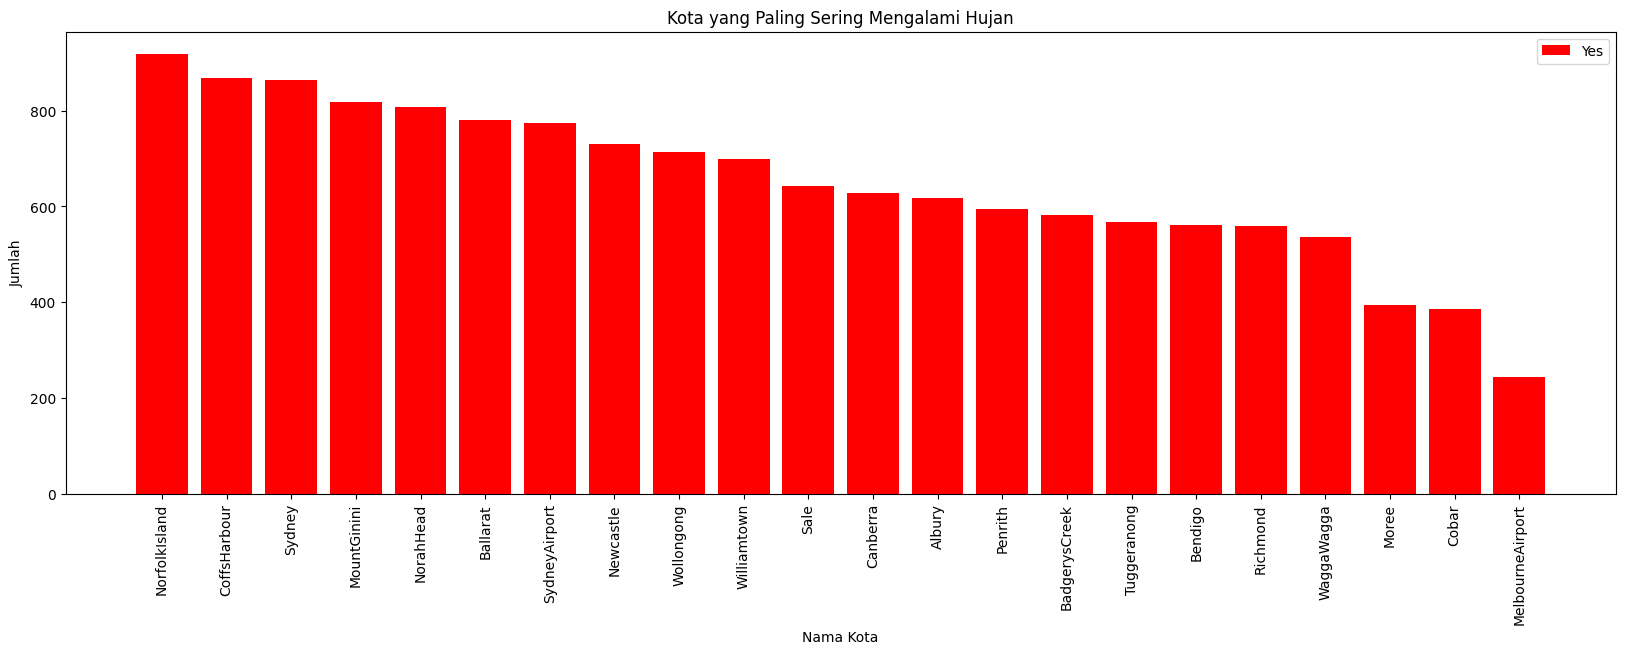

In [38]:
df_rain_tomorrow_yes = df.loc[df['RainTomorrow']=='Yes'].groupby('Location')['RainTomorrow'].count().reset_index(name='Yes')
df_rain_tomorrow_yes = df_rain_tomorrow_yes.sort_values(by='Yes', ascending=False)

fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(df_rain_tomorrow_yes['Location'], df_rain_tomorrow_yes['Yes'], label='Yes',color='red')
ax.set_title('Kota yang Paling Sering Mengalami Hujan')
ax.set_xlabel('Nama Kota')
ax.set_ylabel('Jumlah')
ax.legend()
plt.xticks(rotation=90)
plt.show()

## Analisis Atribut RainTomorrow

### Rainfall dan RainTomorrow

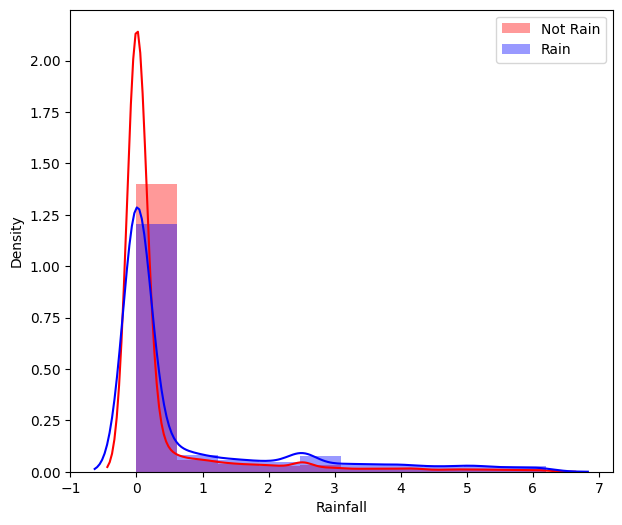

In [39]:
plt.figure(figsize=(7,6))
sns.distplot(df_used.Rainfall[df_used.RainTomorrow=='No'], bins=10, color='r', label='Not Rain')
sns.distplot(df_used.Rainfall[df_used.RainTomorrow=='Yes'], bins=10, color='b', label='Rain')
plt.legend();
plt.show()

### Temperature, Humidity, Pressure, WindSpeed, dan RainTomorrow

In [40]:
df_mean = df_used.copy()
df_mean

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
64541,MelbourneAirport,18.3,21.8,0.0,WSW,63.000000,WSW,N,15.0,11.0,61.000000,85.000000,1008.800000,1008.100000,21.6,20.5,No,Yes
33192,Sydney,11.5,15.8,0.4,SE,54.000000,W,S,15.0,24.0,76.000000,77.000000,1013.700000,1013.900000,12.8,13.2,No,Yes
32484,Sydney,10.5,19.3,0.0,ESE,44.000000,W,ESE,13.0,19.0,81.000000,61.000000,1025.700000,1022.400000,13.7,18.8,No,Yes
63901,Sale,12.4,18.1,0.0,WSW,44.000000,NE,NE,15.0,19.0,70.000000,75.000000,1012.600000,1007.700000,15.9,18.0,No,Yes
60874,Bendigo,4.8,14.8,0.0,NNE,28.000000,ESE,N,6.0,13.0,93.000000,60.000000,1014.800000,1012.400000,9.2,13.3,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30671,Sydney,9.7,14.2,0.0,0.0,39.810197,W,WSW,35.0,31.0,37.000000,32.000000,1012.200000,1012.500000,10.5,13.6,No,No
23287,NorfolkIsland,19.8,25.2,0.0,SSE,28.000000,ESE,ESE,9.0,17.0,76.000000,74.000000,1014.200000,1013.300000,23.1,23.3,No,No
28789,Richmond,15.6,22.6,0.0,E,24.000000,SW,ESE,9.0,20.0,75.000000,68.000000,1026.600000,1022.400000,17.3,20.4,No,No
52191,MountGinini,5.0,15.0,0.0,0.0,39.810197,NW,NNW,11.0,11.0,71.488237,53.019273,1018.261465,1015.823251,10.2,14.3,No,No


In [41]:
df_mean['MeanTemp'] = df_used[['Temp9am', 'Temp3pm']].mean(axis=1)
df_mean['MeanHumidity'] = df_used[['Humidity9am', 'Humidity3pm']].mean(axis=1)
df_mean['MeanPressure'] = df_used[['Pressure9am', 'Pressure3pm']].mean(axis=1)
df_mean['MeanWindSpeed'] = df_used[['WindSpeed9am', 'WindSpeed3pm']].mean(axis=1)

df_mean

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,MeanTemp,MeanHumidity,MeanPressure,MeanWindSpeed
64541,MelbourneAirport,18.3,21.8,0.0,WSW,63.000000,WSW,N,15.0,11.0,...,1008.800000,1008.100000,21.6,20.5,No,Yes,21.05,73.000000,1008.450000,13.0
33192,Sydney,11.5,15.8,0.4,SE,54.000000,W,S,15.0,24.0,...,1013.700000,1013.900000,12.8,13.2,No,Yes,13.00,76.500000,1013.800000,19.5
32484,Sydney,10.5,19.3,0.0,ESE,44.000000,W,ESE,13.0,19.0,...,1025.700000,1022.400000,13.7,18.8,No,Yes,16.25,71.000000,1024.050000,16.0
63901,Sale,12.4,18.1,0.0,WSW,44.000000,NE,NE,15.0,19.0,...,1012.600000,1007.700000,15.9,18.0,No,Yes,16.95,72.500000,1010.150000,17.0
60874,Bendigo,4.8,14.8,0.0,NNE,28.000000,ESE,N,6.0,13.0,...,1014.800000,1012.400000,9.2,13.3,Yes,Yes,11.25,76.500000,1013.600000,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30671,Sydney,9.7,14.2,0.0,0.0,39.810197,W,WSW,35.0,31.0,...,1012.200000,1012.500000,10.5,13.6,No,No,12.05,34.500000,1012.350000,33.0
23287,NorfolkIsland,19.8,25.2,0.0,SSE,28.000000,ESE,ESE,9.0,17.0,...,1014.200000,1013.300000,23.1,23.3,No,No,23.20,75.000000,1013.750000,13.0
28789,Richmond,15.6,22.6,0.0,E,24.000000,SW,ESE,9.0,20.0,...,1026.600000,1022.400000,17.3,20.4,No,No,18.85,71.500000,1024.500000,14.5
52191,MountGinini,5.0,15.0,0.0,0.0,39.810197,NW,NNW,11.0,11.0,...,1018.261465,1015.823251,10.2,14.3,No,No,12.25,62.253755,1017.042358,11.0


**Temperature dan RainTomorrow**

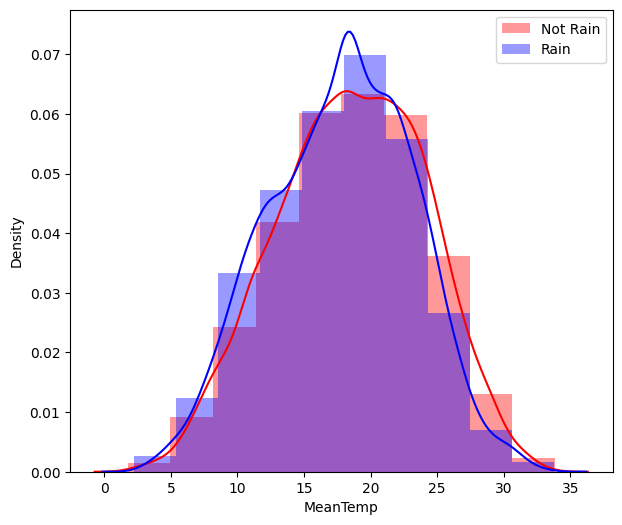

In [42]:
plt.figure(figsize=(7,6))
sns.distplot(df_mean.MeanTemp[df_mean.RainTomorrow=='No'], bins=10, color='r', label='Not Rain')
sns.distplot(df_mean.MeanTemp[df_mean.RainTomorrow=='Yes'], bins=10, color='b', label='Rain')
plt.legend();
plt.show()

Dapat diketahui bahwa :
1. Jika esok hari hujan, rata-rata temperatur yang paling sering muncul adalah sekitar 15 °C
2. Jika esok hari tidak hujan, rata-rata temperatur yang paling sering muncul adalah sekitar 20 °C

**Humidity dan RainTomorrow**

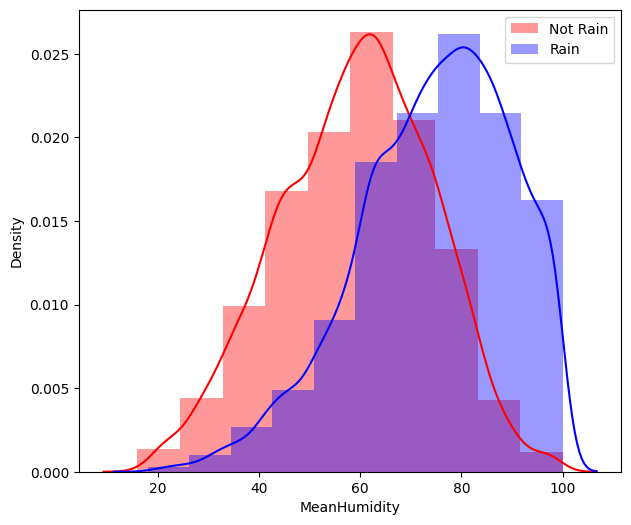

In [43]:
plt.figure(figsize=(7,6))
sns.distplot(df_mean.MeanHumidity[df_mean.RainTomorrow=='No'], bins=10, color='r', label='Not Rain')
sns.distplot(df_mean.MeanHumidity[df_mean.RainTomorrow=='Yes'], bins=10, color='b', label='Rain')
plt.legend();
plt.show()

Dapat diketahui bahwa :
1. Jika esok hari hujan, rata-rata kelembapan yang paling sering muncul adalah sekitar 80%
2. Jika esok hari tidak hujan, rata-rata kelembapan yang paling sering muncul adalah sekitar 60%

**Pressure dan RainTomorrow**

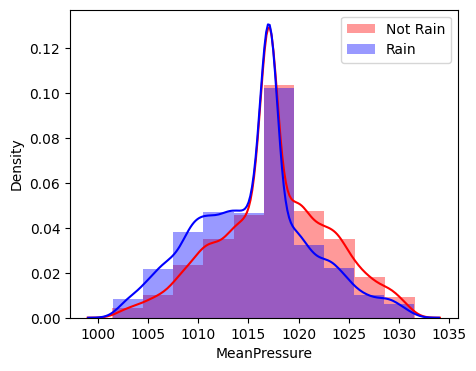

In [44]:
plt.figure(figsize=(5,4))
sns.distplot(df_mean.MeanPressure[df_mean.RainTomorrow=='No'], bins=10, color='r', label='Not Rain')
sns.distplot(df_mean.MeanPressure[df_mean.RainTomorrow=='Yes'], bins=10, color='b', label='Rain')
plt.legend();
plt.show()

Dapat diketahui bahwa rata-rata tekanan udara yang paling sering muncul baik hujan ataupun tidak hujan adalah sekitar 1017 hPa

**WindSpeed dan RainTomorrow**

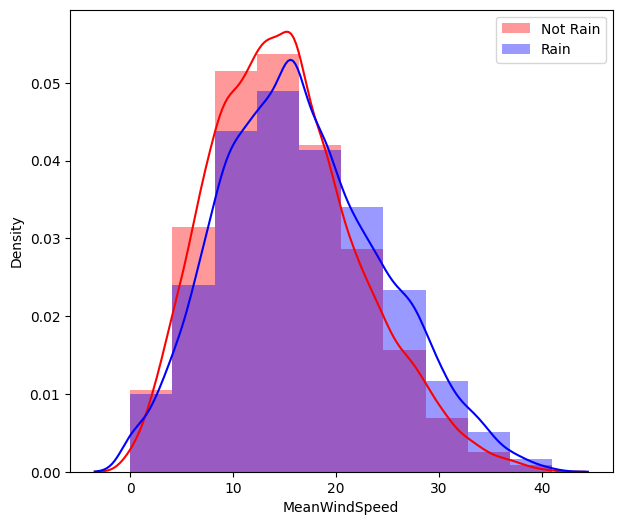

In [45]:
plt.figure(figsize=(7,6))
sns.distplot(df_mean.MeanWindSpeed[df_mean.RainTomorrow=='No'], bins=10, color='r', label='Not Rain')
sns.distplot(df_mean.MeanWindSpeed[df_mean.RainTomorrow=='Yes'], bins=10, color='b', label='Rain')
plt.legend();
plt.show()

Dapat diketahui bahwa rata-rata kecepatan angin yang paling sering muncul baik hujan ataupun tidak hujan adalah sekitar 15 km/jam

# Data Preprocessing

## Encode

In [46]:
# Ubah kedalam bentuk numerik
encoded_data = LabelEncoder()

for cat in categorical_features:
    if cat in df_used.columns.values:
        # Handle NaN values by filling with a placeholder value (e.g., 'missing')
        df_used[cat] = df_used[cat].fillna('missing')

        # Convert the entire column to 'str'
        df_used[cat] = df_used[cat].astype(str)

        # Apply LabelEncoder
        df_used[cat] = encoded_data.fit_transform(df_used[cat])

df_used.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
64541,7,18.3,21.8,0.0,16,63.0,15,3,15.0,11.0,61.0,85.0,1008.8,1008.1,21.6,20.5,0,1
33192,16,11.5,15.8,0.4,10,54.0,13,8,15.0,24.0,76.0,77.0,1013.7,1013.9,12.8,13.2,0,1
32484,16,10.5,19.3,0.0,3,44.0,13,2,13.0,19.0,81.0,61.0,1025.7,1022.4,13.7,18.8,0,1
63901,15,12.4,18.1,0.0,16,44.0,4,4,15.0,19.0,70.0,75.0,1012.6,1007.7,15.9,18.0,0,1
60874,3,4.8,14.8,0.0,6,28.0,2,3,6.0,13.0,93.0,60.0,1014.8,1012.4,9.2,13.3,1,1


## Korelasi Data

<Axes: >

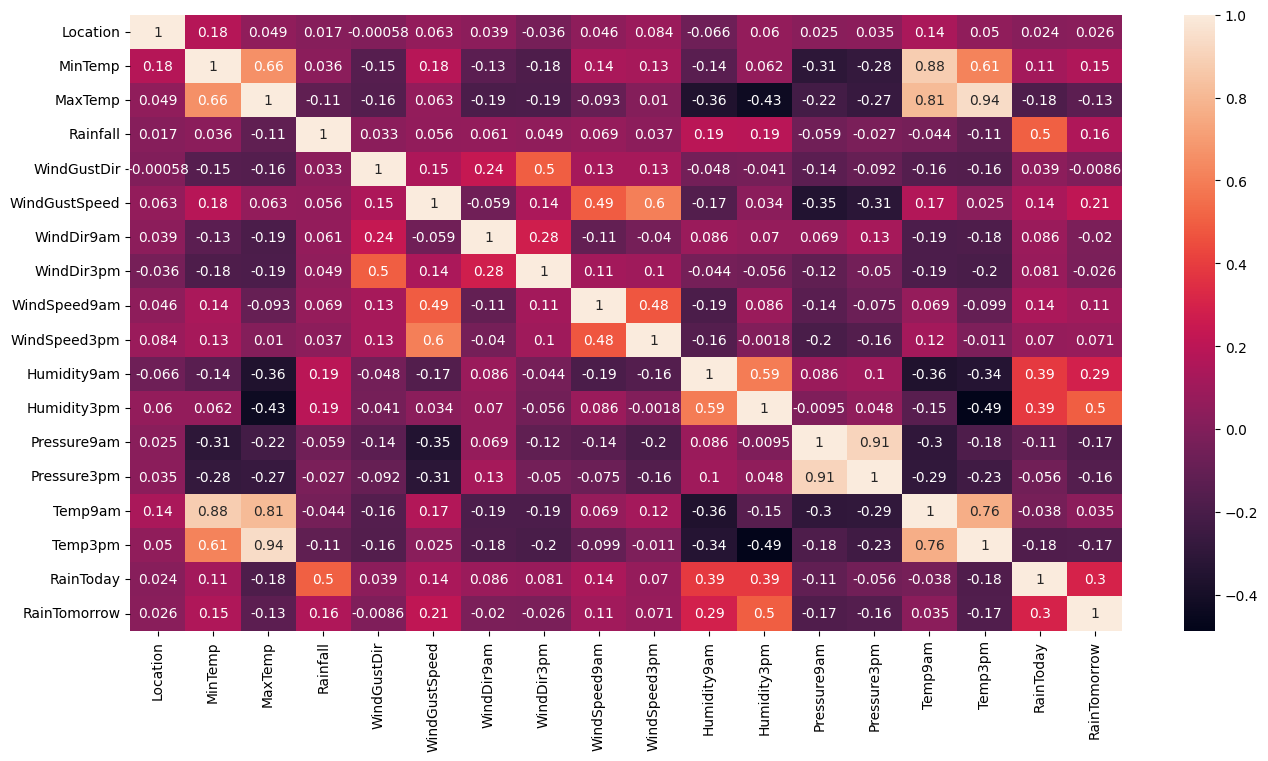

In [47]:
# Cek korelasi
corr_mat = df_used.corr()
fig = plt.figure(figsize=(16, 8))
sns.heatmap(corr_mat, annot=True)

# Pendefinisian Model

Setelah memperoleh data yang akan digunakan untuk pelatihan model melalui proses data cleansing dan data preprocessing. Terdapat 22 atribut yang akan digunakan untuk membuat sistem prediksi hujan di Australia yaitu sebagai berikut :
1. Location : lokasi, nama kota di Australia
2. MinTemp : temperatur terendah hari itu dalam celcius
3. MaxTemp : temperatur tertinggi hari itu dalam celcius
4. Rainfall : jumlah curah hujan hari itu dalam mm
5. Evaporation : jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
6. Sunshine : jumlah jam hari itu cerah dengan cahaya matahari
7. WindGustDir : arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
8. WindGustSpeed : kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
9. WindDir9am : arah angin jam 9 pagi
10. WindDir3pm : arah angin jam 3 sore
11. WindSpeed9am : kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
12. WindSpeed3pm : kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. Humidity9am : humiditas jam 9 pagi dalam persen
14. Humidity3pm : humiditas jam 3 sore dalam persen
15. Pressure9am : tekanan udara jam 9 pagi dalam hpa
16. Pressure3pm : tekanan udara jam 3 sore dalam hpa
17. Cloud9am : persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
18. Cloud3pm : persentase langit yang tertutup awan jam 3 sore
19. Temp9am : temperatur jam 9 pagi dalam celcius
20. Temp3pm : temperatur jam 3 sore dalam celcius
21. RainToday : apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak nilainya 0
22. RainTomorrow : variable yang mau di prediksi

Metode pengujian yang digunakan pada projek kali ini adalah model Logistic Regression dan Support Vector Machine. Logistic Regression adalah metode statistik yang digunakan untuk memodelkan hubungan antara variabel dependen biner (dalam kasus ini, hujan atau tidak hujan) dengan satu atau lebih variabel independen (misalnya suhu, kelembaban, tekanan udara, dan sebagainya). Sedangkan Support Vector Machine (SVM) adalah algoritma pembelajaran mesin yang digunakan untuk membangun model prediktif dengan melakukan klasifikasi pada data yang telah diberikan. SVM berfungsi dengan mencari batas pemisah antara dua kelas data (hujan atau tidak hujan) yang memaksimalkan jarak antara batas pemisah dan contoh data terdekat dari masing-masing kelas.

Sebelum melakukan pengujian data, kumpulan data yang akan digunakan terlebih dahulu dibagi menjadi dua subkumpulan data secara acak. Subkumpulan data tersebut merupakan training set dan test set. Data training set digunakan untuk melatih metode kita, kemudian data test set digunakan untuk mengevaluasi kinerja. Hal ini dilakukan untuk mengevaluasi model yang tidak bias.

## Train-Test-Split

Menentukan variabel bebas dan variabel terikat :

x = variabel bebas = Location, MinTemp, MaxTemp, Rainfall, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm, dan RainToday
y = variabel terikat = RainTomorrow

In [48]:
x = df_used.drop('RainTomorrow', axis=1)
y = df_used['RainTomorrow']

Membagi data menjadi training dan testing dengan training sebesar 70% dan testing sebesar 30%

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Pelatihan Model

## Logistic Regression

In [50]:
logReg = LogisticRegression()

In [51]:
logReg.fit(x_train, y_train)

LogisticRegression()

## Support Vector Machine

In [52]:
sv_machine = svm.SVC(kernel='linear')

In [53]:
sv_machine.fit(x_train, y_train)

SVC(kernel='linear')

# Evaluasi Model

## Logistic Regression

In [54]:
logReg_prediction = logReg.predict(x_test)

In [55]:
accuracy_logReg = accuracy_score(y_test, logReg_prediction)
print("Berdasarkan Logistic Regression akurasi prediksi hujan pada esok hari adalah sebesar : ", accuracy_logReg*100)

Berdasarkan Logistic Regression akurasi prediksi hujan pada esok hari adalah sebesar :  74.6268656716418


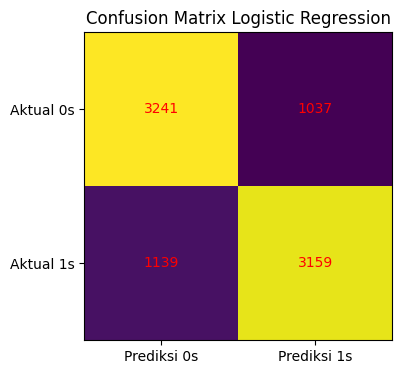

In [56]:
cm_logReg = confusion_matrix(y_test, logReg_prediction)
fig,ax = plt.subplots(figsize=(4,4))
plt.title("Confusion Matrix Logistic Regression")

ax.imshow(cm_logReg)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Prediksi 0s','Prediksi 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Aktual 0s','Aktual 1s'))

for i in range(2):
    for j in range(2):
        ax.text(j,i,cm_logReg[i,j],ha='center',va='center',color='red')

plt.show()

## Support Vector Machine

In [57]:
sv_machine_prediction = sv_machine.predict(x_test)

In [58]:
accuracy_svm = accuracy_score(y_test, sv_machine_prediction)
print("Berdasarkan Support Vector Machine akurasi prediksi hujan pada esok hari adalah sebesar : ", accuracy_svm*100)

Berdasarkan Support Vector Machine akurasi prediksi hujan pada esok hari adalah sebesar :  74.95335820895522


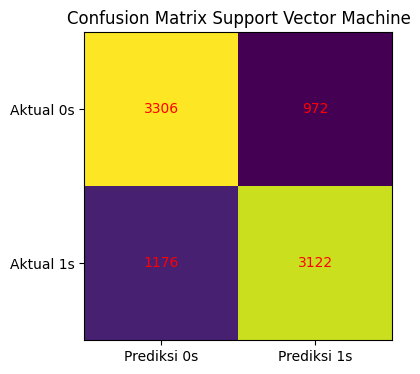

In [59]:
cm_svm = confusion_matrix(y_test, sv_machine_prediction)
fig,ax = plt.subplots(figsize=(4,4))
plt.title("Confusion Matrix Support Vector Machine")

ax.imshow(cm_svm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Prediksi 0s','Prediksi 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Aktual 0s','Aktual 1s'))

for i in range(2):
    for j in range(2):
        ax.text(j,i,cm_svm[i,j],ha='center',va='center',color='red')

plt.show()

# Model Inference

In [60]:
df_used.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [61]:
df_new = pd.DataFrame({
    'Location' : [x_test.iloc[0,0], x_test.iloc[3,0], x_test.iloc[4,0]],
    'MinTemp' : [x_test.iloc[0,1], x_test.iloc[3,1], x_test.iloc[4,1]],
    'MaxTemp' : [x_test.iloc[0,2], x_test.iloc[3,2], x_test.iloc[4,2]],
    'Rainfall' : [x_test.iloc[0,3], x_test.iloc[3,3], x_test.iloc[4,3]],
    'WindGustDir' : [x_test.iloc[0,4], x_test.iloc[3,4], x_test.iloc[4,4]],
    'WindGustSpeed' : [x_test.iloc[0,5], x_test.iloc[3,5], x_test.iloc[4,5]],
    'WindDir9am' : [x_test.iloc[0,6], x_test.iloc[3,6], x_test.iloc[4,6]],
    'WindDir3pm' : [x_test.iloc[0,7], x_test.iloc[3,7], x_test.iloc[4,7]],
    'WindSpeed9am' : [x_test.iloc[0,8], x_test.iloc[3,8], x_test.iloc[4,8]],
    'WindSpeed3pm' : [x_test.iloc[0,9], x_test.iloc[3,9], x_test.iloc[4,9]],
    'Humidity9am' : [x_test.iloc[0,10], x_test.iloc[3,10], x_test.iloc[4,10]],
    'Humidity3pm' : [x_test.iloc[0,11], x_test.iloc[3,11], x_test.iloc[4,11]],
    'Pressure9am' : [x_test.iloc[0,12], x_test.iloc[3,12], x_test.iloc[4,12]],
    'Pressure3pm' : [x_test.iloc[0,13], x_test.iloc[3,13], x_test.iloc[4,13]],
    'Temp9am' : [x_test.iloc[0,14], x_test.iloc[3,14], x_test.iloc[4,14]],
    'Temp3pm' : [x_test.iloc[0,15], x_test.iloc[3,15], x_test.iloc[4,15]],
    'RainToday' : [x_test.iloc[0,16], x_test.iloc[3,16], x_test.iloc[4,16]]
})

df_new

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,6,11.7,29.6,0.0,5,41.0,3,4,7.0,31.0,37.0,39.0,1025.3,1022.2,25.3,28.9,0
1,18,11.3,22.7,0.0,6,26.0,13,6,0.0,13.0,77.0,34.0,1019.5,1013.7,12.9,21.1,0
2,15,10.0,16.6,0.6,14,39.0,14,13,22.0,28.0,74.0,55.0,1025.1,1023.1,11.3,15.6,0


In [62]:
logReg_prediction_new = logReg.predict(df_new)
logReg_prediction_new

array([0, 0, 0])

In [63]:
sv_machine_prediction_new = sv_machine.predict(df_new)
sv_machine_prediction_new

array([0, 0, 0])

# Pengambilan Kesimpulan

**Faktor-Faktor**

Dapat diketahui faktor-faktor yang mempengaruhi hujan pada esok hari di Australia adalah sebagai berikut :

1. Location : lokasi, nama kota di Australia
2. MinTemp : temperatur terendah hari itu dalam celcius
3. MaxTemp : temperatur tertinggi hari itu dalam celcius
4. Rainfall : jumlah curah hujan hari itu dalam mm
5. Evaporation : jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
6. Sunshine : jumlah jam hari itu cerah dengan cahaya matahari
7. WindGustDir : arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
8. WindGustSpeed : kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
9. WindDir9am : arah angin jam 9 pagi
10. WindDir3pm : arah angin jam 3 sore
11. WindSpeed9am : kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
12. WindSpeed3pm : kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. Humidity9am : humiditas jam 9 pagi dalam persen
14. Humidity3pm : humiditas jam 3 sore dalam persen
15. Pressure9am : tekanan udara jam 9 pagi dalam hpa
16. Pressure3pm : tekanan udara jam 3 sore dalam hpa
17. Cloud9am : persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
18. Cloud3pm : persentase langit yang tertutup awan jam 3 sore
19. Temp9am : temperatur jam 9 pagi dalam celcius
20. Temp3pm : temperatur jam 3 sore dalam celcius
21. RainToday : apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak nilainya 0

**Akurasi**

Berdasarkan pelatihan model yang telah dilakukan dapat diperoleh akurasi dari model Logistic Regression adalah sebesar 75.63921568627451, sedangkan akurasi dari model Support Vector Machine adalah sebesar 76.60653594771242. Maka dari itu, dapat disimpulkan bahwa model yang cocok untuk prediksi hujan pada dataset ini adalah Support Vector Machine

**Wawasan**

Insight yang ditemukan dalam prediksi hujan pada esok hari di Australia adalah sebagai berikut :
1. Dapat diketahui bahwa semakin rendah temperatur kemungkinan besar besok akan hujan
2. Dapat diketahui bahwa semakin tinggi tingkat kelembapan kemungkinan besar besok akan hujan
3. Dapat diketahui bahwa semakin rendah tekanan kemungkinan besar besok akan hujan
3. Dapat diketahui bahwa semakin tinggi kecepatan angin kemungkinan besar besok akan hujan